## Factors that affects transfereability of adverserial samples

In this notebook I pointed out factors that can affect how well adverserial samples tranfer in another model. This might not be exhaustive but it comprises of all the observations I made while analysing the adverserial samples I generated in the three models: Lenet, alexnet and vgg11.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Factor 1: Type of attack used in generating the adverserial sample

I observed that some attacks are just more powerful than others. It might be due to its implementation, but I observed that the distance used in implementing those powerful attacks had a very strong impact on them. 

In [2]:
index = np.linspace(1,40,40, dtype= int)

In [3]:
lenet_com = pd.read_csv('lenetmodel_attackscombined_forallmodels.csv')
lenet_com.index+=1

alexnet_com = pd.read_csv('alexnetmodel_attackscombined_forallmodels.csv')
alexnet_com .index+=1

vgg11_com = pd.read_csv('vgg11model_attackscombined_forallmodels.csv')
vgg11_com.index+=1

In [4]:
### converting the mean_prediction column of each model to list
lenet_com1 = np.around(lenet_com['mean_misprediction'].to_list(), decimals = 0)
lenet_com1  = lenet_com1.astype(int)

alexnet_com1 = np.around(alexnet_com['mean_misprediction'].to_list(), decimals = 0)
alexnet_com1  = alexnet_com1.astype(int)

vgg11_com1 = np.around(vgg11_com['mean_misprediction'].to_list(), decimals = 0)
vgg11_com1   = vgg11_com1 .astype(int)

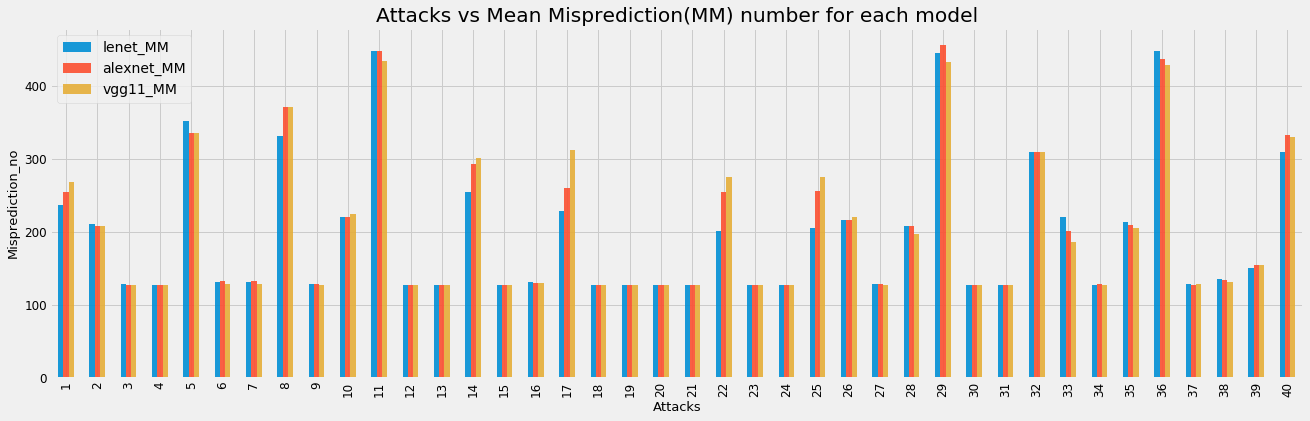

In [5]:
labels_com = np.linspace(1,40,40, dtype= int)

lenet_misprediction = [237, 211, 129, 128, 352, 131, 131, 332, 129, 220, 448, 127, 128,255, 127, 131, 229, 127, 128,
                       127, 128, 202, 127, 128, 205, 216,129, 209, 446, 127, 127, 310, 221, 128, 214, 449, 129, 135, 
                       151,310]

alexnet_misprediction = [255, 209, 128, 127, 336, 133, 133, 371, 129, 221, 448, 127, 127,294, 127, 130, 260, 127, 128,
                         127, 128, 255, 127, 128, 256, 217,129, 208, 457, 127, 127, 310, 202, 129, 210, 438, 128, 134, 
                         155,333]

vgg11_misprediction = [269, 208, 128, 127, 336, 129, 129, 372, 128, 225, 434, 127, 127,302, 127, 130, 313, 127, 128, 
                       127, 127, 276, 127, 127, 276, 220, 128, 198, 433, 127, 127, 310, 187, 128, 205, 429, 129, 132, 
                       155, 331]

plt.style.use('fivethirtyeight')
combined = pd.DataFrame({'lenet_MM':lenet_misprediction,
                   'alexnet_MM': alexnet_misprediction, 'vgg11_MM':vgg11_misprediction}, index=labels_com)

ax = combined.plot(kind='bar', title ="Attacks vs Mean Misprediction(MM) number for each model",figsize=(20,6),legend=True, fontsize=12, alpha=0.9)
ax.set_xlabel("Attacks",fontsize=13)
ax.set_ylabel("Misprediction_no",fontsize=13)
plt.show()

Here you can see that attack with indexes: 1,5,8,11,14,17,25,29,32,36,40 were more power when compared with the rest of the attaks. Attack index 11,29and 36 stood out the most. Investigating why this was so lead to the second factor I discovered.

### Factor 2: Type of distance used in implementing the attack.  

I observed that same attack implemented using different distances yielded different results. The linf based distance attacks tends to produce higher misprediction compared to the L2 and L1 distance based attacks. For this analysis, I used only attacks that had implementation for Linf and/or L1 and L2. This reduced the sample dataset down to 30.

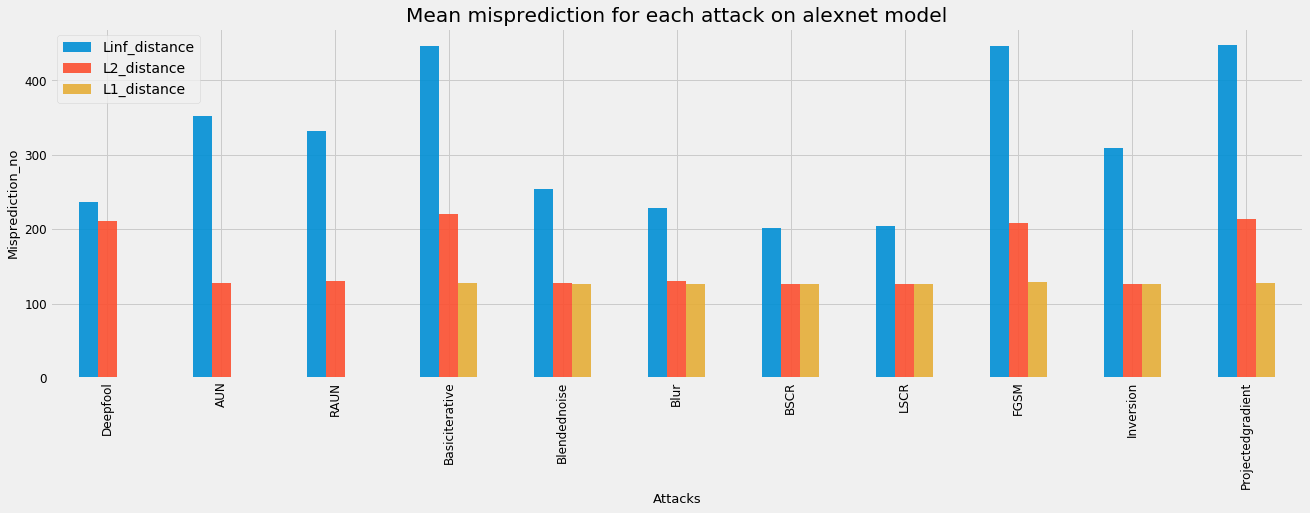

In [6]:
#Lenet model

lenet_linf = [237, 352, 332, 446, 254,229,202,205,446,309,448]
lenet_l2 = [211,128,131,220,128,131,127,127,209,127,214]
lenet_l1 = [0,0,0,128,126,127,126,126,129,126,128]


labels_lenet = ['Deepfool', 'AUN', 'RAUN', 'Basiciterative', 'Blendednoise','Blur','BSCR',
          'LSCR','FGSM','Inversion','Projectedgradient']

lenet_disttype  = pd.DataFrame({'Linf_distance': lenet_linf,
                   'L2_distance': lenet_l2, 'L1_distance': lenet_l1}, index=labels_lenet)

ax = lenet_disttype.plot(kind='bar', title ="Mean misprediction for each attack on alexnet model",figsize=(20,6),legend=True, fontsize=12, alpha=0.9)
ax.set_xlabel("Attacks",fontsize=13)
ax.set_ylabel("Misprediction_no",fontsize=13)
plt.show()

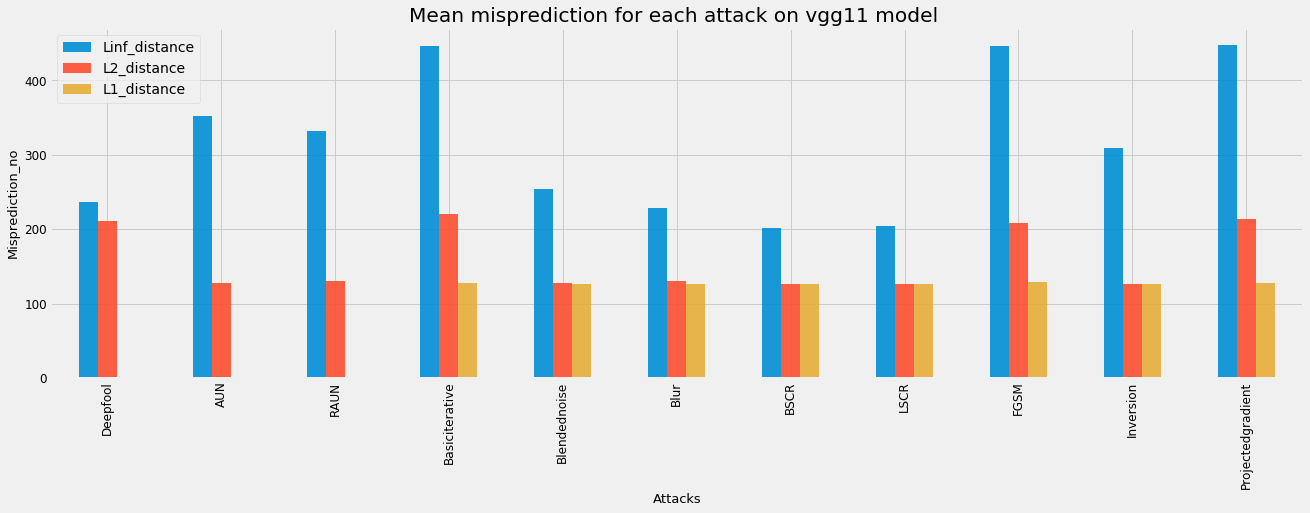

In [7]:
#alexnet model 

alexnet_linf = [254, 335, 371, 448, 294,259,254,256,457,309,438]
alexnet_l2 = [209,127,132,220,127,129,127,127,208,127,210]
alexnet_l1 = [0,0,0,129,126,126,126,126,129,126,129]


labels_alexnet = ['Deepfool', 'AUN', 'RAUN', 'Basiciterative', 'Blendednoise','Blur','BSCR',
          'LSCR','FGSM','Inversion','Projectedgradient']

alexnet_disttype = pd.DataFrame({'Linf_distance': lenet_linf,
                   'L2_distance': lenet_l2, 'L1_distance': lenet_l1}, index=labels_alexnet)

ax = alexnet_disttype.plot(kind='bar', title ="Mean misprediction for each attack on vgg11 model ",figsize=(20,6),legend=True, fontsize=12, alpha=0.9)
ax.set_xlabel("Attacks",fontsize=13)
ax.set_ylabel("Misprediction_no",fontsize=13)
plt.show()

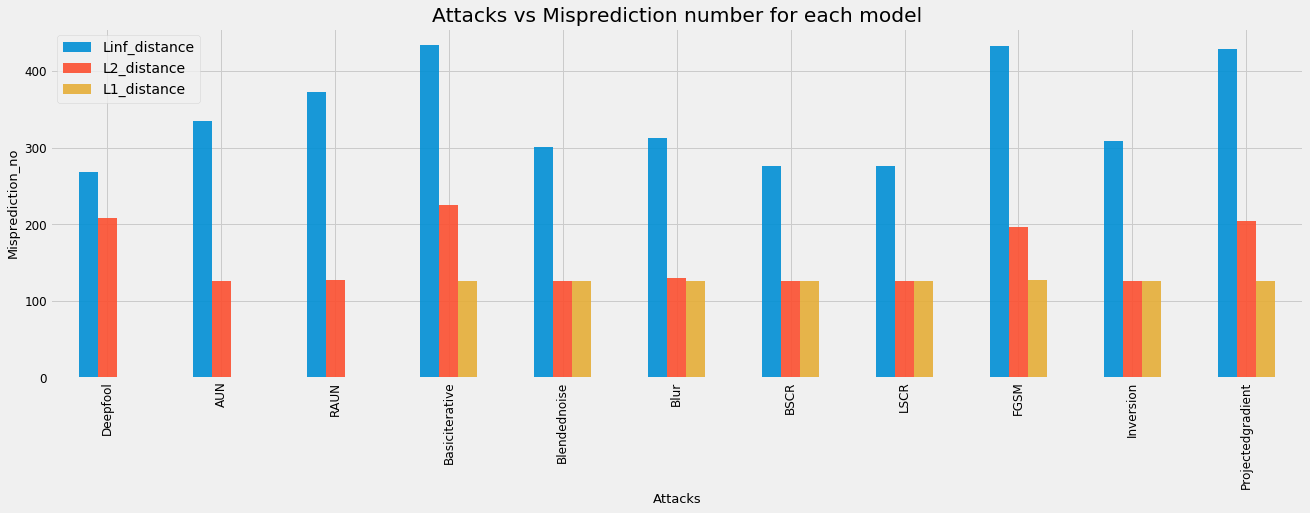

In [8]:
#Vgg11 model

vgg11_linf = [268, 335, 372, 434, 301,313,276,276,433,309,428]
vgg11_l2 = [208,127,128,225,127,130,127,127,197,127,204]
vgg11_l1 = [0,0,0,127,126,126,126,126,128,126,127]


labels_vgg11 = ['Deepfool', 'AUN', 'RAUN', 'Basiciterative', 'Blendednoise','Blur','BSCR',
          'LSCR','FGSM','Inversion','Projectedgradient']

vgg11_disttype = pd.DataFrame({'Linf_distance': vgg11_linf,
                   'L2_distance': vgg11_l2, 'L1_distance': vgg11_l1}, index=labels_vgg11)

ax = vgg11_disttype.plot(kind='bar', title ="Attacks vs Misprediction number for each model",figsize=(20,6),legend=True, fontsize=12, alpha=0.9)
ax.set_xlabel("Attacks",fontsize=13)
ax.set_ylabel("Misprediction_no",fontsize=13)
plt.show()

matching the names of the attack shown above to their indexes:

- Deepfool(linf) : index 1
- Deepfool(l2) : index 2
- AUN-additive uniform noise-(l2): index 4
- AUN-additive uniform noise-(linf): index 5
- RAUN-repeated additive uniform noise-(l2): index 7
- RAUN-repeated additive uniform noise-(linf): index 8
- Basic iterative attack(l1): index 9
- Basic iterative attack(l2): index 10
- Basic iterative attack(linf): index 11
- Blended noise attack(l1): index 12
- Blended noise attack(l2): index 13
- Blended noise attack(l1): index 14
- Blur attack(l1): index 15
- Blur attack(l2): index 16
- Blur attack(l1): index 17
- BSCR-Binary search contrast reduction attack-(l1) : index 20
- BSCR-Binary search contrast reduction attack-(l2) : index 21
- BSCR-Binary search contrast reduction attack-(linf) : index 22
- LSCR-Linear search contrast reduction attack-(L1) : index 23
- LSCR-Linear search contrast reduction attack-(L2) : index 24
- LSCR-Linear search contrast reduction attack-(Linf) : index 25
- FGSM- fast gradient sign attack-(l1): index 27
- FGSM- fast gradient sign attack-(l2): index 28
- FGSM- fast gradient sign attack-(linf): index 29
- Inversion attack (l1): index 30
- Inversion attack (l2): index 31
- Inversion attack (linf): index 32
- projected gradient descent attack(l1): index 34
- projected gradient descent attack(l2): index 35
- projected gradient descent attack(linf): index 36


### Factor 3: Closeness of the target model to the model that generated the attack.

I observed that the there is high transfereability in the model that generated the attack than other models. for instance, when I generated the attack using alexnet model, the attack transfered well to that model than other models. By transfer well, I mean the number of misprediction was way higher than the benchmark (the number of misprediction when no perturbation was applied) for atleast the Linf and L2 based distance attack. 

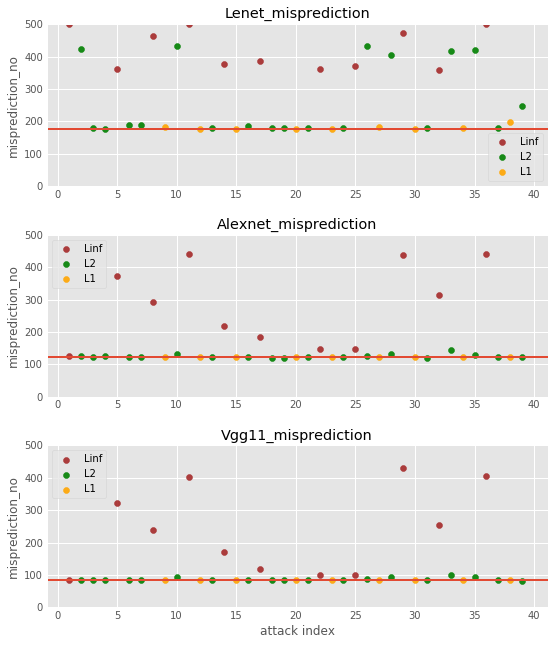

In [9]:
# lenet model

lenet_linf= [500,0,0,0,361,0,0,464,0,0,500,0,0,376,0,0,385,0,0,0,0,361,0,0,370,0,0,0,473,0,0,359,0,0,0,500,0,0,0,0]
lenet_linf = np.array(lenet_linf, dtype=np.float32)
lenet_linf[lenet_linf == 0] = np.nan

lenet_l2 = [0,423,179,176,0,188,189,0,0,433,0,0,179,0,0,186,0,178,179,0,178,0,0,178,0,433,0,404,0,0,178,0,418,0,419,0,178,0,248,0]
lenet_l2 = np.array(lenet_l2, dtype=np.float32)
lenet_l2 [lenet_l2  == 0] = np.nan

lenet_l1 = [0,0,0,0,0,0,0,0,181,0,0,175,0,0,176,0,0,0,0,175,0,0,175,0,0,0,182,0,0,175,0,0,0,180,0,0,0,199,0,0]
lenet_l1 = np.array(lenet_l1, dtype=np.float32)
lenet_l1[lenet_l1 == 0] = np.nan

alexnet_linf = [126,0,0,0,372,0,0,293,0,0,440,0,0 ,217,0,0,185,0,0,0,0,147,0,0,147,0,0,0,436,0,0, 315,0,0,0,440,0,0,0,0]
alexnet_linf= np.array(alexnet_linf, dtype=np.float32)
alexnet_linf[alexnet_linf == 0] = np.nan

alexnet_l2 = [0,126,124,125,0,121,121,0,0,132,0,0,121,0,0,123,0,120,120,0,121,0,0,121,0,127,0,131,0,0,120,0,144,0,
              130,0,124,0,124,0]
alexnet_l2= np.array(alexnet_l2, dtype=np.float32)
alexnet_l2[alexnet_l2 == 0] = np.nan

alexnet_l1 = [0,0,0,0,0,0,0,0,121,0,0,121,0,0, 121,0,0,0,0, 121,0,0, 121,0,0,0, 121, 0,0,121,0,0,0, 121,0,0,0, 123,0,0]
alexnet_l1= np.array(alexnet_l1, dtype=np.float32)
alexnet_l1[alexnet_l1 == 0] = np.nan


vgg11_linf = [85,0,0,0,323,0,0,240,0,0,403,0,0,171,0,0,117,0,0,0,0,99,0,0,99,0,0,0,429,0,0,255,0,0,0,406,0,0,0,0]
vgg11_linf = np.array(vgg11_linf, dtype=np.float32)
vgg11_linf[vgg11_linf == 0] = np.nan


vgg11_l2 = [0,85, 85, 84,0, 84, 84,0,0, 95,0,0, 84, 0,0,84, 0,84, 84, 0,84,0,0, 84,0, 87,0, 92,0,0, 84, 
            0,101,0, 94, 0,85,0, 82,0]
vgg11_l2 = np.array(vgg11_l2, dtype=np.float32)
vgg11_l2[vgg11_l2 == 0] = np.nan


vgg11_l1 = [0,0,0,0,0,0,0,0,84,0,0, 84,0,0, 84,0,0,0,0, 84,0,0, 84,0,0,0, 84, 0,0, 84,0,0,0, 84,0,0,0, 84,0,0]
vgg11_l1  = np.array(vgg11_l1, dtype=np.float32)
vgg11_l1[vgg11_l1 == 0] = np.nan


plt.style.use('ggplot')

fig = plt.figure(figsize = (8,10))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.set_title('Lenet_misprediction')
ax1.set_ylim(0, 500)
ax1.scatter(index, lenet_linf, c = 'brown', alpha = '0.9', label = 'Linf')
ax1.scatter(index, lenet_l2, c = 'green', alpha = '0.9', label = 'L2')
ax1.scatter(index, lenet_l1, c = 'orange', alpha = '0.9', label = 'L1')
ax1.axhline(175, linewidth=2)
ax1.set_ylabel('misprediction_no')
ax1.legend(loc= ('lower right'))

ax2.set_title('Alexnet_misprediction')
ax2.set_ylim(0, 500)
ax2.scatter(index, alexnet_linf, c = 'brown', alpha = '0.9', label = 'Linf')
ax2.scatter(index, alexnet_l2, c = 'green', alpha = '0.9', label = 'L2 ')
ax2.scatter(index, alexnet_l1, c = 'orange', alpha = '0.9', label = 'L1')
ax2.axhline(121, linewidth=2)
ax2.set_ylabel('misprediction_no')
ax2.legend(loc= ('upper left'))

ax3.set_title('Vgg11_misprediction')
ax3.set_ylim(0, 500)
ax3.scatter(index, vgg11_linf, c = 'brown', alpha = '0.9', label = 'Linf')
ax3.scatter(index, vgg11_l2, c = 'green', alpha = '0.9', label = 'L2 ')
ax3.scatter(index, vgg11_l1, c = 'orange', alpha = '0.9', label = 'L1')
ax3.axhline(84, linewidth=2)
ax3.legend(loc= ('upper left'))
ax3.set_xlabel('attack index')
ax3.set_ylabel('misprediction_no')

plt.subplots_adjust(hspace=0.3)

plt.show()

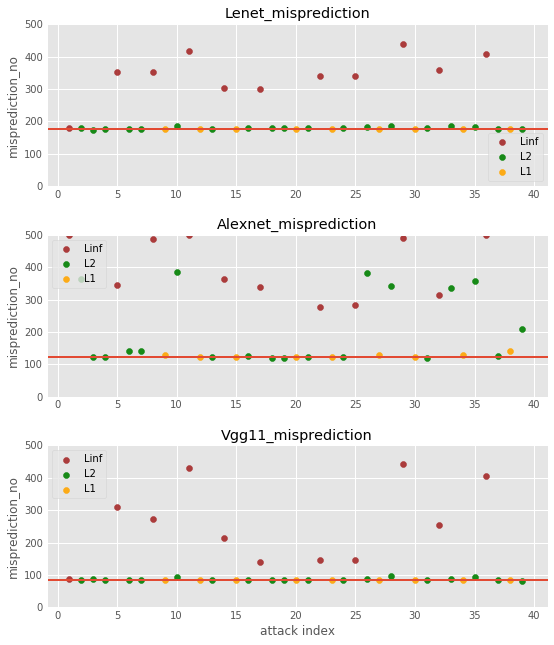

In [10]:
#alexnet model 

lenet_linf= [178,0,0,0,352,0,0,353,0,0,417,0,0,303,0,0,300,0,0,0,0,341,0,0,341,0,0,0,440,0,0,359,0,0,0,409,0,0,0,0]
lenet_linf = np.array(lenet_linf, dtype=np.float32)
lenet_linf[lenet_linf == 0] = np.nan

lenet_l2 = [0,179,174,175,0,175,175,0,0,184,0,0,177,0,0,179,0,178,179,0,178,0,0,178,0,182,0,186,0,0,178,0,184,0,181,0,175,0,177,0]
lenet_l2 = np.array(lenet_l2, dtype=np.float32)
lenet_l2 [lenet_l2  == 0] = np.nan

lenet_l1 = [0,0,0,0,0,0,0,0,176,0,0,175,0,0,175,0,0,0,0,175,0,0,175,0,0,0,176,0,0,175,0,0,0,176,0,0,0,175,0,0]
lenet_l1 = np.array(lenet_l1, dtype=np.float32)
lenet_l1[lenet_l1 == 0] = np.nan


alexnet_linf = [500,0,0,0,344,0,0,488,0,0,499,0,0 ,364,0,0,340,0,0,0,0,278,0,0,282,0,0,0,491,0,0, 315,0,0,0,500,0,0,0,0]
alexnet_linf= np.array(alexnet_linf, dtype=np.float32)
alexnet_linf[alexnet_linf == 0] = np.nan

alexnet_l2 = [0,364,122,123,0,141,140,0,0,386,0,0,121,0,0,126,0,120,120,0,121,0,0,121,0,382,0,341,0,0,120,0,334,0,
              357,0,126,0,208,0]
alexnet_l2= np.array(alexnet_l2, dtype=np.float32)
alexnet_l2[alexnet_l2 == 0] = np.nan

alexnet_l1 = [0,0,0,0,0,0,0,0,128,0,0,121,0,0, 121,0,0,0,0, 121,0,0, 121,0,0,0, 128, 0,0,121,0,0,0, 128,0,0,0, 141,0,0]
alexnet_l1= np.array(alexnet_l1, dtype=np.float32)
alexnet_l1[alexnet_l1 == 0] = np.nan


vgg11_linf = [86,0,0,0,311,0,0,273,0,0,429,0,0,215,0,0,139,0,0,0,0,145,0,0,145,0,0,0,441,0,0,255,0,0,0,405,0,0,0,0]
vgg11_linf = np.array(vgg11_linf, dtype=np.float32)
vgg11_linf[vgg11_linf == 0] = np.nan


vgg11_l2 = [0,85, 87, 84,0, 84, 83,0,0, 92,0,0, 84, 0,0,84, 0,84, 84, 0,84,0,0, 84,0, 88,0, 97,0,0, 84, 
            0,88,0, 92, 0,83,0, 80,0]
vgg11_l2 = np.array(vgg11_l2, dtype=np.float32)
vgg11_l2[vgg11_l2 == 0] = np.nan

vgg11_l1 = [0,0,0,0,0,0,0,0,84,0,0, 84,0,0, 84,0,0,0,0, 84,0,0, 84,0,0,0, 84, 0,0, 84,0,0,0, 84,0,0,0, 85,0,0]
vgg11_l1  = np.array(vgg11_l1, dtype=np.float32)
vgg11_l1[vgg11_l1 == 0] = np.nan


fig = plt.figure(figsize = (8,10))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.set_title('Lenet_misprediction')
ax1.set_ylim(0, 500)
ax1.scatter(index, lenet_linf, c = 'brown', alpha = '0.9', label = 'Linf')
ax1.scatter(index, lenet_l2, c = 'green', alpha = '0.9', label = 'L2')
ax1.scatter(index, lenet_l1, c = 'orange', alpha = '0.9', label = 'L1')
ax1.axhline(175, linewidth=2)
ax1.set_ylabel('misprediction_no')
ax1.legend(loc= ('lower right'))

ax2.set_title('Alexnet_misprediction')
ax2.set_ylim(0, 500)
ax2.scatter(index, alexnet_linf, c = 'brown', alpha = '0.9', label = 'Linf')
ax2.scatter(index, alexnet_l2, c = 'green', alpha = '0.9', label = 'L2 ')
ax2.scatter(index, alexnet_l1, c = 'orange', alpha = '0.9', label = 'L1')
ax2.axhline(121, linewidth=2)
ax2.set_ylabel('misprediction_no')
ax2.legend(loc= ('upper left'))

ax3.set_title('Vgg11_misprediction')
ax3.set_ylim(0, 500)
ax3.scatter(index, vgg11_linf, c = 'brown', alpha = '0.9', label = 'Linf')
ax3.scatter(index, vgg11_l2, c = 'green', alpha = '0.9', label = 'L2 ')
ax3.scatter(index, vgg11_l1, c = 'orange', alpha = '0.9', label = 'L1')
ax3.axhline(84, linewidth=2)
ax3.legend(loc= ('upper left'))
ax3.set_xlabel('attack index')
ax3.set_ylabel('misprediction_no')

plt.subplots_adjust(hspace=0.3)

plt.show()

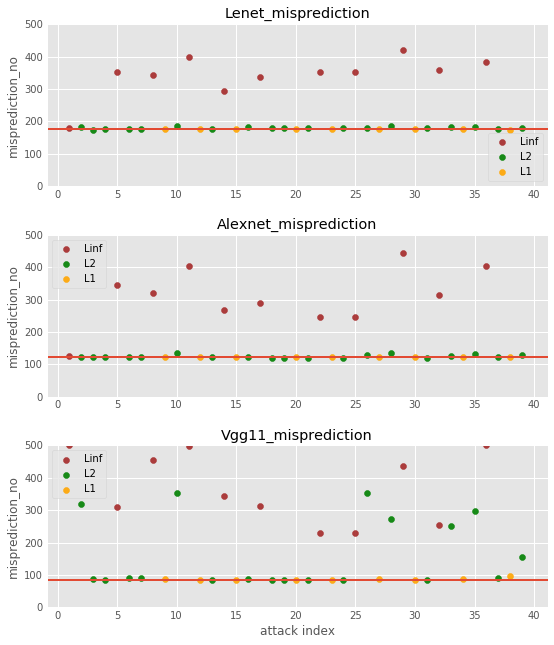

In [11]:
# Vgg11 model

lenet_linf= [179,0,0,0,352,0,0,342,0,0,400,0,0,295,0,0,338,0,0,0,0,353,0,0,353,0,0,0,419,0,0,359,0,0,0,382,0,0,0,0]
lenet_linf = np.array(lenet_linf, dtype=np.float32)
lenet_linf[lenet_linf == 0] = np.nan

lenet_l2 = [0,181,174,175,0,175,175,0,0,185,0,0,175,0,0,181,0,178,179,0,178,0,0,178,0,180,0,184,0,0,178,0,183,0,183,
            0,176,0,180,0]
lenet_l2 = np.array(lenet_l2, dtype=np.float32)
lenet_l2 [lenet_l2  == 0] = np.nan

lenet_l1 = [0,0,0,0,0,0,0,0,176,0,0,175,0,0,175,0,0,0,0,175,0,0,175,0,0,0,176,0,0,175,0,0,0,176,0,0,0,174,0,0]
lenet_l1 = np.array(lenet_l1, dtype=np.float32)
lenet_l1[lenet_l1 == 0] = np.nan


alexnet_linf = [127,0,0,0,344,0,0,320,0,0,404,0,0 ,268,0,0,289,0,0,0,0,247,0,0,246,0,0,0,444,0,0, 315,0,0,0,404,0,0,0,0]
alexnet_linf= np.array(alexnet_linf, dtype=np.float32)
alexnet_linf[alexnet_linf == 0] = np.nan

alexnet_l2 = [0,124,122,123,0,121,121,0,0,136,0,0,121,0,0,123,0,120,120,0,120,0,0,120,0,128,0,135,0,0,120,0,127,0,
              133,0,121,0,129,0]
alexnet_l2= np.array(alexnet_l2, dtype=np.float32)
alexnet_l2[alexnet_l2 == 0] = np.nan


alexnet_l1 = [0,0,0,0,0,0,0,0,121,0,0,121,0,0, 121,0,0,0,0, 121,0,0, 121,0,0,0, 121, 0,0,121,0,0,0, 121,0,0,0, 123,0,0]
alexnet_l1= np.array(alexnet_l1, dtype=np.float32)
alexnet_l1[alexnet_l1 == 0] = np.nan

vgg11_linf = [500,0,0,0,311,0,0,455,0,0,499,0,0,342,0,0,313,0,0,0,0,229,0,0,230,0,0,0,437,0,0,255,0,0,0,500,0,0,0,0]
vgg11_linf = np.array(vgg11_linf, dtype=np.float32)
vgg11_linf[vgg11_linf == 0] = np.nan

vgg11_l2 = [0,319, 87, 84 ,0, 91, 90,0,0, 354,0,0, 85, 0,0,87, 0,84, 84, 0,84,0,0, 84,0, 353,0, 274,0,0, 84, 
            0,252,0, 298, 0, 89,0, 156,0]
vgg11_l2 = np.array(vgg11_l2, dtype=np.float32)
vgg11_l2[vgg11_l2 == 0] = np.nan

vgg11_l1 = [0,0,0,0,0,0,0,0,86,0,0, 84,0,0, 84,0,0,0,0, 84,0,0, 84,0,0,0, 87, 0,0, 84,0,0,0, 86,0,0,0, 98,0,0]
vgg11_l1  = np.array(vgg11_l1, dtype=np.float32)
vgg11_l1[vgg11_l1 == 0] = np.nan


fig = plt.figure(figsize = (8,10))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.set_title('Lenet_misprediction')
ax1.set_ylim(0, 500)
ax1.scatter(index, lenet_linf, c = 'brown', alpha = '0.9', label = 'Linf')
ax1.scatter(index, lenet_l2, c = 'green', alpha = '0.9', label = 'L2')
ax1.scatter(index, lenet_l1, c = 'orange', alpha = '0.9', label = 'L1')
ax1.axhline(175, linewidth=2)
ax1.set_ylabel('misprediction_no')
ax1.legend(loc= ('lower right'))

ax2.set_title('Alexnet_misprediction')
ax2.set_ylim(0, 500)
ax2.scatter(index, alexnet_linf, c = 'brown', alpha = '0.9', label = 'Linf')
ax2.scatter(index, alexnet_l2, c = 'green', alpha = '0.9', label = 'L2 ')
ax2.scatter(index, alexnet_l1, c = 'orange', alpha = '0.9', label = 'L1')
ax2.axhline(121, linewidth=2)
ax2.set_ylabel('misprediction_no')
ax2.legend(loc= ('upper left'))

ax3.set_title('Vgg11_misprediction')
ax3.set_ylim(0, 500)
ax3.scatter(index, vgg11_linf, c = 'brown', alpha = '0.9', label = 'Linf')
ax3.scatter(index, vgg11_l2, c = 'green', alpha = '0.9', label = 'L2 ')
ax3.scatter(index, vgg11_l1, c = 'orange', alpha = '0.9', label = 'L1')
ax3.axhline(84, linewidth=2)
ax3.legend(loc= ('upper left'))
ax3.set_xlabel('attack index')
ax3.set_ylabel('misprediction_no')

plt.subplots_adjust(hspace=0.3)

plt.show()

In the above plots, we can see that the L1 distance attack barely transfers as the value is always equal or below the number of misprediction before even any perturbation is applied. Also the graphs shows that applying an attack might not have any impact since the number of misprediction that occurs is equal or even less that the number that occured when there is no perturbation. 

In [31]:
plt.style.use('fivethirtyeight')

def vis_plot_300(final):
    final_300 = final[250:300]
    ax = final_300.plot(kind='bar', title ="Image index vs Misprediction number for each model",figsize=(30,4),legend=True, fontsize=12, alpha=0.9)
    ax.set_xlabel("Image_index",fontsize=13)
    ax.set_ylabel("Misprediction_no",fontsize=13)
    plt.show()  
    
def vis_plot_400(final):
    final_400 = final[350:400]
    ax = final_400.plot(kind='bar', title ="Image index vs Misprediction number for each model",figsize=(30,4),legend=True, fontsize=12, alpha=0.9)
    ax.set_xlabel("Image_index",fontsize=13)
    ax.set_ylabel("Misprediction_no",fontsize=13)
    plt.show()
    
def vis_plot_450(final):
    final_450 = final[400:450]
    ax = final_450.plot(kind='bar', title ="Image index vs Misprediction number for each model",figsize=(30,4),legend=True, fontsize=12, alpha=0.9)
    ax.set_xlabel("Image_index",fontsize=13)
    ax.set_ylabel("Misprediction_no",fontsize=13)
    plt.show()        
    

### Factor 4: Sensitivity of the adverserial samples to the models

The barchart below shows the number of misprediction or sensitivity of the adverserial samples generated using all the 40 attacks to each of the model. If the 40 adverserial samples generated from each model- lenet, alexnet and vgg11- for each of the image was misclassified by all the three model, then the number of misprediction that shows up in the y axis will be 40. 

In [14]:
lenet_total = pd.read_csv('lenetmodel_total_df.csv')
alexnet_total = pd.read_csv('alexnetmodel_total_df.csv')
vgg11_total = pd.read_csv('vgg11model_total_df.csv')

#### Some adverserial samples are very sensitive, thus, can easily get mispredicted by almost all the models. Eg 362,364,376

adverserial samples generated using lenet model


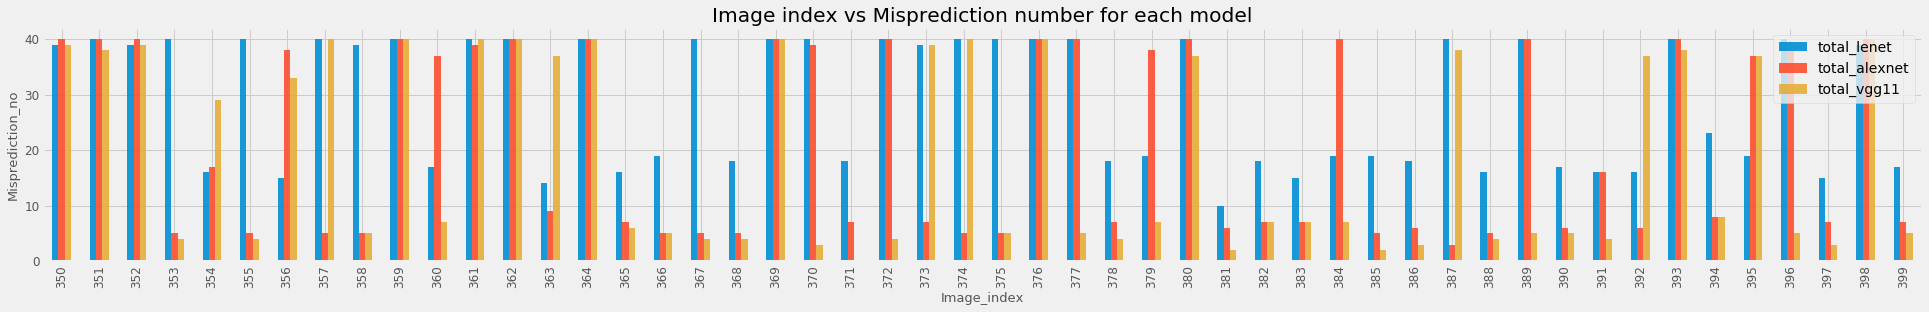

adverserial samples generated using alexnet model


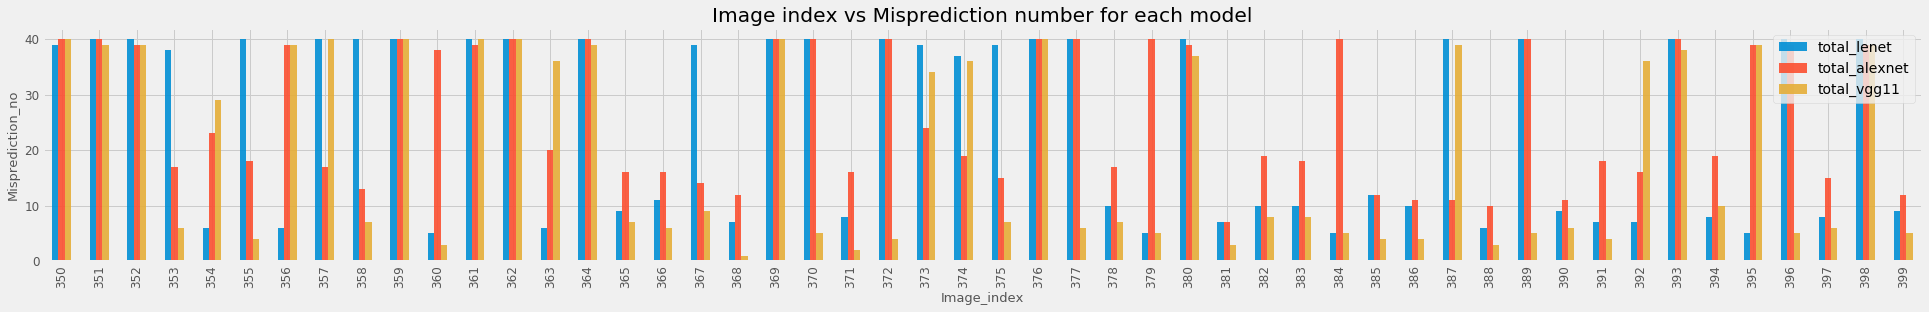

adverserial samples generated using vgg11 model


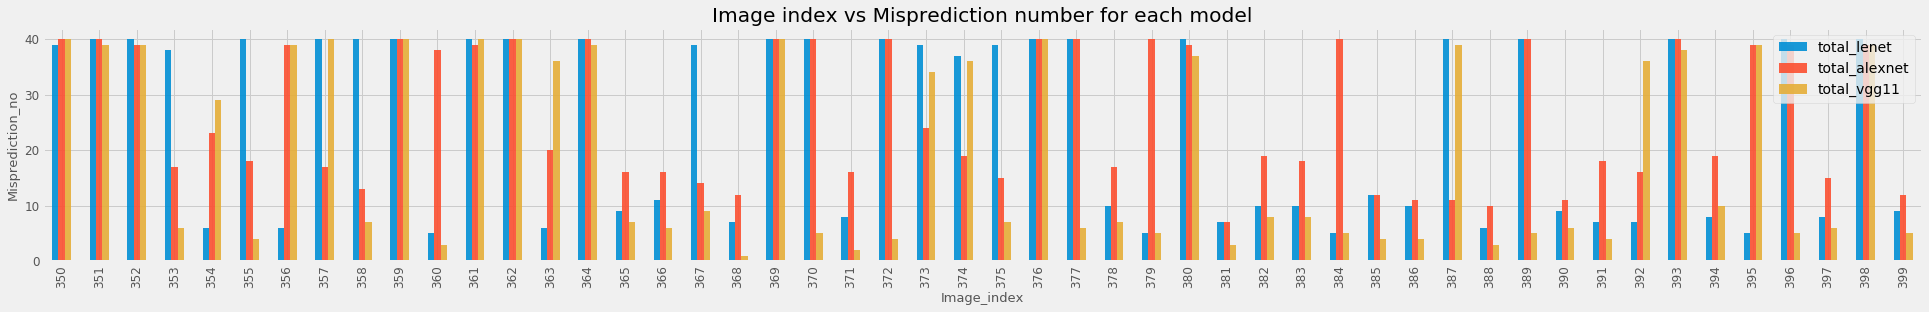

In [26]:
print('Adverserial samples generated using lenet model')
vis_plot_400(lenet_total)
print('Adverserial samples generated using alexnet model')
vis_plot_400(alexnet_total)
print('Adverserial samples generated using vgg11 model')
vis_plot_400(alexnet_total)

#### Some adverserial samples are insensitive to any of the models and rarely gets misclassified. Eg 404,442,446

adverserial samples generated using lenet model


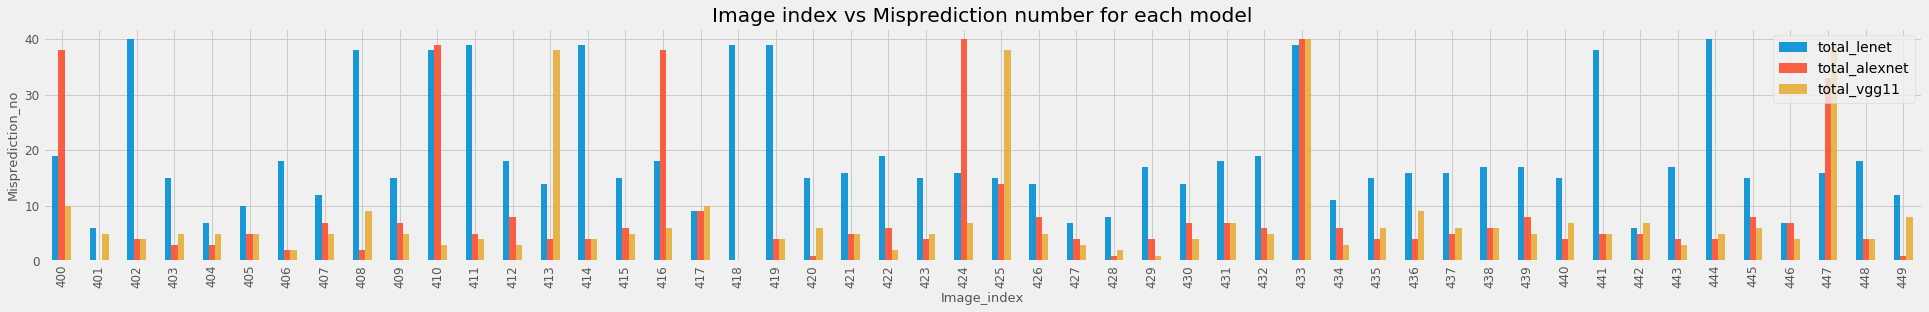

adverserial samples generated using alexnet model


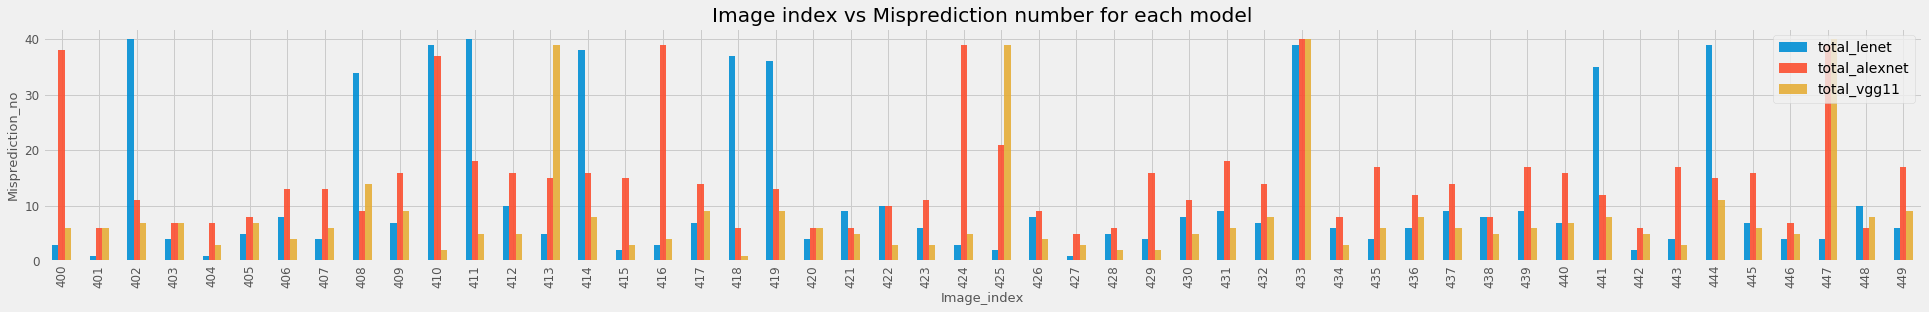

adverserial samples generated using vgg11 model


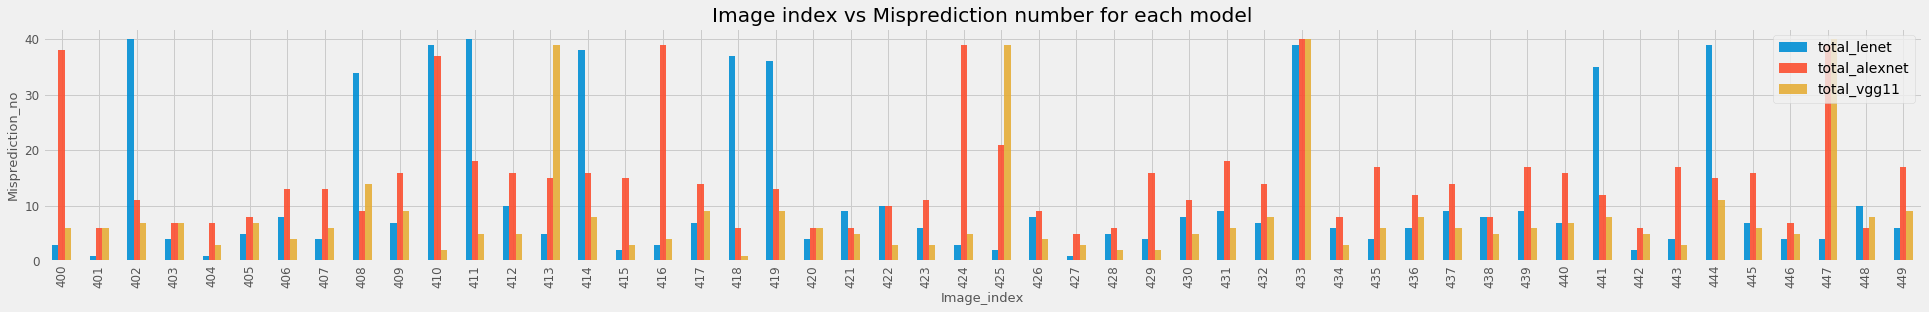

In [28]:
print('Adverserial samples generated using lenet model')
vis_plot_450(lenet_total)
print('Adverserial samples generated using alexnet model')
vis_plot_450(alexnet_total)
print('Adverserial samples generated using vgg11 model')
vis_plot_450(alexnet_total)

#### Some adverserial samples are sensitive to just a particular model and can easily be correctly classified by others .Eg 257(lenet), 294(alexnet), 275(vgg11)

Adverserial samples generated using lenet model


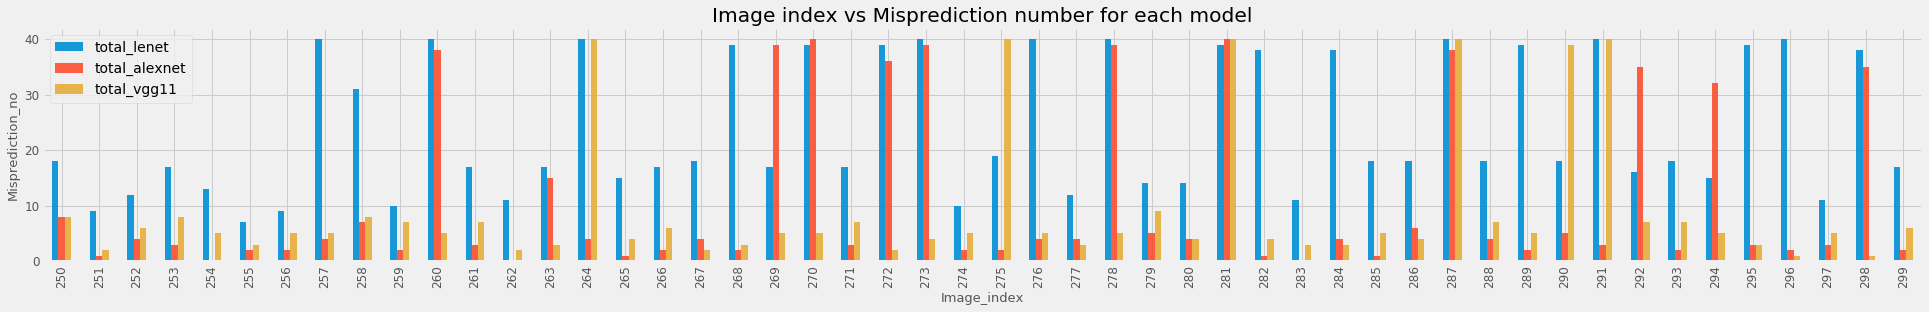

Adverserial samples generated using alexnet model


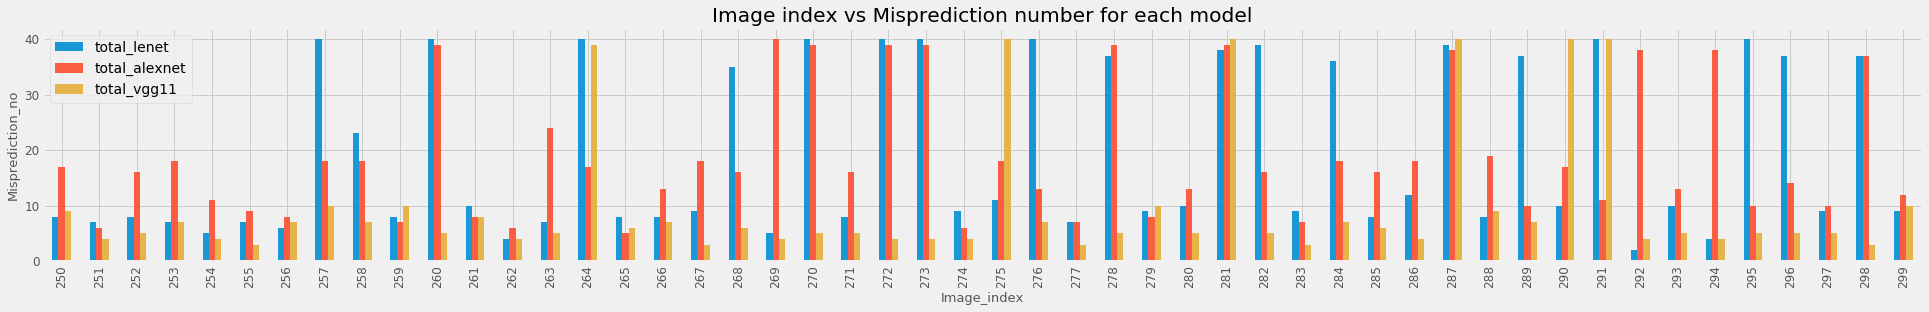

Adverserial samples generated using vgg11 model


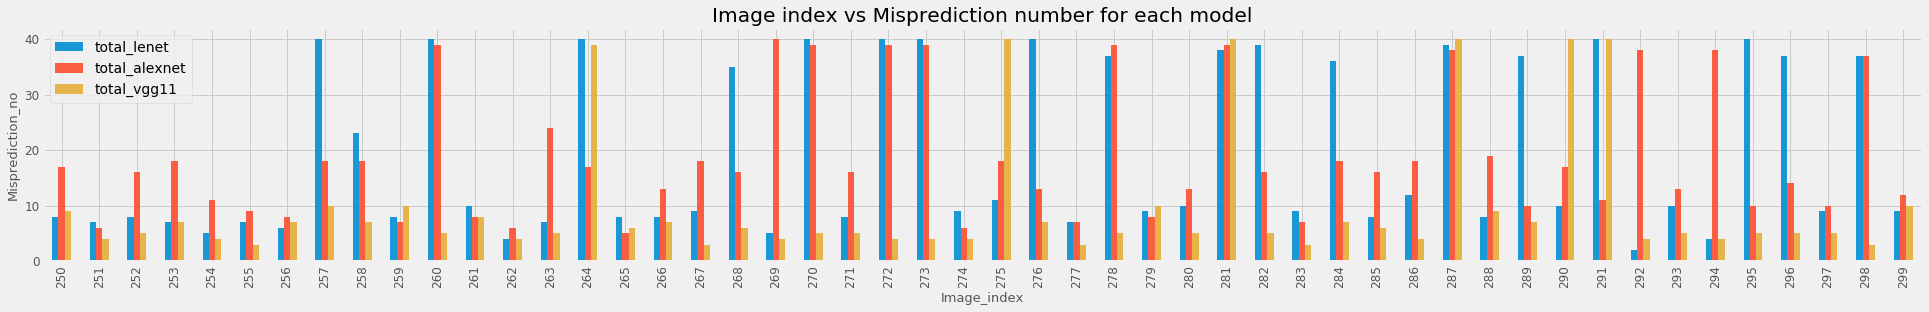

In [32]:
print('Adverserial samples generated using lenet model')
vis_plot_300(lenet_total)
print('Adverserial samples generated using alexnet model')
vis_plot_300(alexnet_total)
print('Adverserial samples generated using vgg11 model')
vis_plot_300(alexnet_total)